In [22]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

### Dataset Loading

In [23]:
dataset = pd.read_csv("Battery_RUL.csv")

# KNN Model

### Preprocessing

In [24]:
features = [
    "Discharge Time (s)",
    "Decrement 3.6-3.4V (s)",
    "Max. Voltage Dischar. (V)",
    "Min. Voltage Charg. (V)",
    "Time at 4.15V (s)",
    "Time constant current (s)",
    "Charging time (s)",
]

X = dataset[features]
y = dataset["RUL"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42
)

### Training

In [25]:
knn = KNeighborsRegressor(n_neighbors=4)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=4)

### Predicting

In [26]:
y_pred = knn.predict(X_test)

### KNN Model Evaluation

In [27]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean squared error:", mse)
print("r2 score: ", r2)

Mean squared error: 1922.7041307232912
r2 score:  0.9809369165314118


### Model Performance Visualization

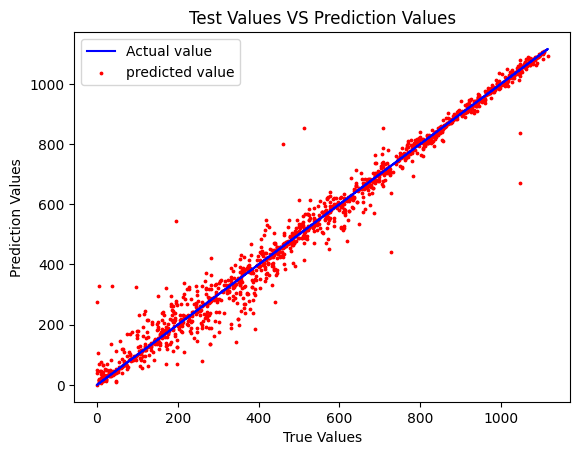

In [28]:
plt.plot(y_test, y_test, label="Actual value",color='blue')
plt.scatter(y_test, y_pred, label="predicted value", color='red', s=3)
plt.title("Test Values VS Prediction Values")
plt.xlabel("True Values")
plt.ylabel("Prediction Values")
plt.legend()
plt.show()